In [ ]:
#!pip install --upgrade numpy
#!pip install pydicom
#!pip install kornia
!pip install scikit-image
#! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
#!pip install pylibjpeg
#!pip install pylibjpeg-libjpeg
#!pip install Pillow
#!pip install opencv-python
#!pip3 install python-gdcm

In [ ]:
import certifi
import skimage
import kornia
import pydicom
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

import pydicom,kornia
from pydicom.dataset import Dataset as DcmDataset
from pydicom.tag import BaseTag as DcmTag
from pydicom.multival import MultiValue as DcmMultiValue
from PIL import Image

try:
    import cv2
    cv2.setNumThreads(0)
except: pass
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom
import seaborn as sns
matplotlib.rcParams['image.cmap'] = 'bone'
import pandas as pd

import pydicom
import numpy as np
from matplotlib import pyplot as plt
import pylibjpeg

import os
import seaborn as sns
#from pandas_profiling import ProfileReport
import pydicom
from glob import glob
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
from skimage import exposure
import cv2
import warnings
warnings.filterwarnings('ignore')
import pydicom
import os
from PIL import Image
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
from fastai.vision.all import *
#import albumentations as A
import cv2
from pathlib import Path
from joblib import Parallel, delayed
import shutil
#from ensemble_boxes import *
import pandas as pd
import codecs

In [ ]:
# -*- coding: utf-8 -*-
#dataset_dir = '/content/drive/MyDrive'
#df = pd.read_csv(f'{dataset_dir}/患者プロファイル抽出_身長歴.csv', index_col=0)
with codecs.open(f'患者プロファイル抽出_身長歴.csv', "r", "Shift-JIS", "ignore") as file:
    df_height = pd.read_table(file, delimiter=",")
    #df_1 = df_1['患者ID'].astype(int)
df_height['PatientID']=df_height['患者ＩＤ']+1
df_height['height']=df_height['身長cm']
df_height.head(5)
len(df_height)

21122

In [ ]:
#dataset_dir = '/content/drive/MyDrive'
with codecs.open(f'kennshinn.csv', "r", "Shift-JIS", "ignore") as file:
    kennshinn = pd.read_table(file, delimiter=",")
kennshinn = pd.DataFrame(kennshinn, columns = ["ID", "身長", "体重"])
kennshinn['PatientID']=kennshinn['ID']
kennshinn['height']=kennshinn['身長']
kennshinn['weight']=kennshinn['体重']
kennshinn = pd.DataFrame(kennshinn, columns = ["PatientID", "height", "weight"])
kennshinn = kennshinn.drop_duplicates(subset = "PatientID")
kennshinn.head(5)
len(kennshinn)

15693

In [ ]:
df_height= df_height.append(kennshinn)
#df_height = kennshinn
len(df_height)

36815

In [ ]:
df_height = df_height.drop_duplicates(subset= "PatientID")
len(df_height)

35458

In [ ]:
#dataset_dir = '/content/drive/MyDrive'
with codecs.open(f'患者プロファイル抽出_体重歴.csv', "r", "Shift-JIS", "ignore") as file:
    df_weight = pd.read_table(file, delimiter=",")
df_weight['PatientID']=df_weight['患者ＩＤ']+1
df_weight['weight']=df_weight['体重kg']
df_weight.head(5)

,プロファイル項目名,患者ＩＤ,項目順,歴管理番号,体重kg,体重_測定日,更新者ＩＤ,更新日,更新時間,プロファイル項目属性,プロファイル項目ID,PatientID,weight
0,総合/身体的情報/体重歴,1065.0,1.0,5.0,40.0,2019/3/26,1277,20190326.0,7:09:47,BDY02,BDY002,1066.0,40.0
1,総合/身体的情報/体重歴,1073.0,1.0,8.0,42.8,2016/3/28,,0.0,0:00:00,BDY02,BDY002,1074.0,42.8
2,総合/身体的情報/体重歴,1081.0,1.0,1.0,52.0,2018/3/14,,0.0,0:00:00,BDY02,BDY002,1082.0,52.0
3,総合/身体的情報/体重歴,1146.0,1.0,8.0,41.3,2021/11/14,1085,20211114.0,16:27:03,BDY02,BDY002,1147.0,41.3
4,総合/身体的情報/体重歴,1162.0,1.0,8.0,44.8,2020/12/6,1148,20201206.0,13:04:25,BDY02,BDY002,1163.0,44.8


In [ ]:
df_weight= df_weight.append(kennshinn)
len(df_weight)

37060

In [ ]:
df_weight = df_weight.drop_duplicates(subset= "PatientID")
len(df_weight)

35713

In [ ]:
with codecs.open(f'MDICOM2.csv', "r", "Shift-JIS", "ignore") as file: #MDICOM2.csv が立位のリスト MDICOMgai.csvが仰臥位のリスト
    df_2 = pd.read_table(file, delimiter=",")
df_2.head(5)

,ｻｿ,file,PatientID,Age,Sex,StudyDescription
0,0,/content/drive/MyDrive/MDICOM/jMAC.1.2.392.200036.9107.307.15451.20160406.80001.1004750.jpg,160881,058Y,M,閭ｸ驛ｨ遶倶ｽ搾ｼｰ竊抵ｼ｡
1,1,/content/drive/MyDrive/MDICOM/jMAC.1.2.392.200036.9107.307.15451.20160406.80807.1004753.jpg,1683047,037Y,M,閭ｸ驛ｨ遶倶ｽ搾ｼｰ竊抵ｼ｡
2,2,/content/drive/MyDrive/MDICOM/jMAC.1.2.392.200036.9107.307.15451.20160406.81623.1004756.jpg,9288,028Y,M,閭ｸ驛ｨ遶倶ｽ搾ｼｰ竊抵ｼ｡
3,3,/content/drive/MyDrive/MDICOM/jMAC.1.2.392.200036.9107.307.15451.20160405.81011.1004615.jpg,9300,028Y,M,閭ｸ驛ｨ遶倶ｽ搾ｼｰ竊抵ｼ｡
4,4,/content/drive/MyDrive/MDICOM/jMAC.1.2.392.200036.9107.307.15451.20160405.80346.1004612.jpg,1682970,065Y,M,閭ｸ驛ｨ遶倶ｽ搾ｼｰ竊抵ｼ｡


In [ ]:
df_3height = pd.merge(df_height, df_2, on='PatientID')
df_4height = pd.DataFrame(df_3height, columns = ["file","PatientID", "height", "Age", "Sex"])
df_4height["file"] = df_4height["file"].str[23:]
df_4height["file"] = df_4height["file"].str.replace('/',"\\")
df_4height.head(5)

,file,PatientID,height,Age,Sex
0,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180314.110439.1064865.jpg,1082.0,164.0,081Y,M
1,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20210105.141349.1045084.jpg,1309.0,161.0,078Y,M
2,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20201221.151908.1044347.jpg,1309.0,161.0,078Y,M
3,MDICOM\jMAC.1.2.392.200036.9107.500.305.3548.20160118.84419.31.103548.jpg,4197.0,166.0,064Y,M
4,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170126.80858.1029982.jpg,4197.0,166.0,065Y,M


In [ ]:
df_3weight = pd.merge(df_weight, df_2, on='PatientID')
df_4weight = pd.DataFrame(df_3weight, columns = ["file", "PatientID", "weight", "Age", "Sex"])
df_4weight["file"] = df_4weight["file"].astype(str)

df_4weight["file"] = df_4weight["file"].str[23:]
df_4weight["file"] = df_4weight["file"].str.replace('/',"\\")
df_4weight.head(5)

,file,PatientID,weight,Age,Sex
0,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180314.110439.1064865.jpg,1082.0,52.0,081Y,M
1,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20210105.141349.1045084.jpg,1309.0,50.3,078Y,M
2,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20201221.151908.1044347.jpg,1309.0,50.3,078Y,M
3,MDICOM\jMAC.1.2.392.200036.9107.500.305.3548.20160118.84419.31.103548.jpg,4197.0,68.0,064Y,M
4,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170126.80858.1029982.jpg,4197.0,68.0,065Y,M


In [ ]:
path = Path('MDICOM')
img_files = get_image_files(path)
trn,val = RandomSplitter()(img_files)
trn

(#11928) [493,9204,2325,14777,703,4335,9821,3136,13501,5568...]

In [ ]:
path = Path('MDICOM')
img_files = get_image_files(path)
#trn,val = RandomSplitter()(img_files)
df = pd.DataFrame({'file': img_files})
#df["file"] = df["file"].trn
df["file"] = df["file"].astype(str)
df.head(5)

,file
0,MDICOM\jMAC.1.2.392.200036.9107.307.10173.20160130.95041.1020391.jpg
1,MDICOM\jMAC.1.2.392.200036.9107.307.10173.20170111.95241.1033010.jpg
2,MDICOM\jMAC.1.2.392.200036.9107.307.12040.20160311.75124.1043048.jpg
3,MDICOM\jMAC.1.2.392.200036.9107.307.14000.20160608.110303.1000466.jpg
4,MDICOM\jMAC.1.2.392.200036.9107.307.14000.20160608.112647.1000467.jpg


In [ ]:
df_5height = pd.merge(df_4height, df, on='file')
df_5height['Age'] = df_5height['Age'].str.strip('Y')
df_5height = df_5height.dropna(subset=['height'])
df_5height["Age"] = df_5height["Age"].astype(int)
#df_5height=df_5height[df_5height['Age']>40]
df_5height.head(5)

,file,PatientID,height,Age,Sex
0,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180314.110439.1064865.jpg,1082.0,164.0,81,M
1,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20210105.141349.1045084.jpg,1309.0,161.0,78,M
2,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20201221.151908.1044347.jpg,1309.0,161.0,78,M
3,MDICOM\jMAC.1.2.392.200036.9107.500.305.3548.20160118.84419.31.103548.jpg,4197.0,166.0,64,M
4,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170126.80858.1029982.jpg,4197.0,166.0,65,M


In [ ]:
df_5weight = pd.merge(df_4weight, df, on='file')
df_5weight['Age'] = df_5weight['Age'].str.strip('Y')
df_5weight = df_5weight.dropna(subset=['weight'])
df_5weight["Age"] = df_5weight["Age"].astype(int)
#df_5weight=df_5weight[df_5weight['Age']>40]
df_5weight.head(5)

,file,PatientID,weight,Age,Sex
0,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180314.110439.1064865.jpg,1082.0,52.0,81,M
1,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20210105.141349.1045084.jpg,1309.0,50.3,78,M
2,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20201221.151908.1044347.jpg,1309.0,50.3,78,M
3,MDICOM\jMAC.1.2.392.200036.9107.500.305.3548.20160118.84419.31.103548.jpg,4197.0,68.0,64,M
4,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170126.80858.1029982.jpg,4197.0,68.0,65,M


In [ ]:
BMI_df= pd.merge(df_5height, df_5weight, on='file')
BMI_df = pd.DataFrame(BMI_df, columns = ["file", "PatientID", "height", "weight", "Age"])
BMI_df["file"] = BMI_df["file"].astype(str)
BMI_df["BMI"] = BMI_df["weight"]/((BMI_df["height"]/100)**2)
BMI_df["BSA"] = 0.007184*(BMI_df["weight"]**0.425)*(BMI_df["height"]**0.725)
BMI_df = BMI_df.dropna(subset=['BMI'])
BMI_df["sarcopenia"] = BMI_df['BMI']<19 #first experiment 18.5
BMI_df.loc[(BMI_df['sarcopenia']==True),'sarcopenia']="sarcopenia"
BMI_df.loc[(BMI_df['sarcopenia']==False),'sarcopenia']="non-sarcopenia"
BMI_df=BMI_df[BMI_df['BMI']<40]
BMI_df=BMI_df[BMI_df['BMI']>10]
BMI_df

,file,PatientID,height,weight,Age,BMI,BSA,sarcopenia
0,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180314.110439.1064865.jpg,NaN,164.0,52.0,NaN,19.333730,1.553923,non-sarcopenia
1,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20210105.141349.1045084.jpg,NaN,161.0,50.3,NaN,19.405116,1.511755,non-sarcopenia
2,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20201221.151908.1044347.jpg,NaN,161.0,50.3,NaN,19.405116,1.511755,non-sarcopenia
3,MDICOM\jMAC.1.2.392.200036.9107.500.305.3548.20160118.84419.31.103548.jpg,NaN,166.0,68.0,NaN,24.677021,1.756956,non-sarcopenia
4,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170126.80858.1029982.jpg,NaN,166.0,68.0,NaN,24.677021,1.756956,non-sarcopenia
...,...,...,...,...,...,...,...,...
10842,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190722.80952.1004684.jpg,NaN,167.2,72.3,NaN,25.862217,1.812785,non-sarcopenia
10843,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190722.82658.1004692.jpg,NaN,174.6,63.5,NaN,20.829807,1.770220,non-sarcopenia
10844,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20161215.114003.1026609.jpg,NaN,173.3,65.6,NaN,21.842720,1.785169,non-sarcopenia
10845,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190723.80312.1004815.jpg,NaN,173.3,65.6,NaN,21.842720,1.785169,non-sarcopenia


In [ ]:
BMI_df= pd.merge(df_5height, df_5weight, on='file')
BMI_df = pd.DataFrame(BMI_df, columns = ["file", "PatientID", "height", "weight", "Age"])
BMI_df["file"] = BMI_df["file"].astype(str)
BMI_df["BMI"] = BMI_df["weight"]/((BMI_df["height"]/100)**2)
BMI_df["BSA"] = 0.007184*(BMI_df["weight"]**0.425)*(BMI_df["height"]**0.725)
BMI_df = BMI_df.dropna(subset=['BMI'])
BMI_df["sarcopenia"] = BMI_df['BMI']<18.5 #first experiment 18.5
BMI_df.loc[(BMI_df['sarcopenia']==True),'sarcopenia']="sarcopenia"
BMI_df.loc[(BMI_df['sarcopenia']==False),'sarcopenia']="non-sarcopenia"
BMI_df185=BMI_df[BMI_df['BMI']<40]
BMI_df185=BMI_df[BMI_df['BMI']>10]
BMI_df185

,file,PatientID,height,weight,Age,BMI,BSA,sarcopenia
0,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180314.110439.1064865.jpg,NaN,164.0,52.0,NaN,19.333730,1.553923,non-sarcopenia
1,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20210105.141349.1045084.jpg,NaN,161.0,50.3,NaN,19.405116,1.511755,non-sarcopenia
2,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20201221.151908.1044347.jpg,NaN,161.0,50.3,NaN,19.405116,1.511755,non-sarcopenia
3,MDICOM\jMAC.1.2.392.200036.9107.500.305.3548.20160118.84419.31.103548.jpg,NaN,166.0,68.0,NaN,24.677021,1.756956,non-sarcopenia
4,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170126.80858.1029982.jpg,NaN,166.0,68.0,NaN,24.677021,1.756956,non-sarcopenia
...,...,...,...,...,...,...,...,...
10842,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190722.80952.1004684.jpg,NaN,167.2,72.3,NaN,25.862217,1.812785,non-sarcopenia
10843,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190722.82658.1004692.jpg,NaN,174.6,63.5,NaN,20.829807,1.770220,non-sarcopenia
10844,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20161215.114003.1026609.jpg,NaN,173.3,65.6,NaN,21.842720,1.785169,non-sarcopenia
10845,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190723.80312.1004815.jpg,NaN,173.3,65.6,NaN,21.842720,1.785169,non-sarcopenia


In [ ]:
BMI_df= pd.merge(df_5height, df_5weight, on='file')
BMI_df = pd.DataFrame(BMI_df, columns = ["file", "PatientID", "height", "weight", "Age"])
BMI_df["file"] = BMI_df["file"].astype(str)
BMI_df["BMI"] = BMI_df["weight"]/((BMI_df["height"]/100)**2)
BMI_df["BSA"] = 0.007184*(BMI_df["weight"]**0.425)*(BMI_df["height"]**0.725)
BMI_df = BMI_df.dropna(subset=['BMI'])
BMI_df["sarcopenia"] = BMI_df['BMI']<20 #first experiment 18.5
BMI_df.loc[(BMI_df['sarcopenia']==True),'sarcopenia']="sarcopenia"
BMI_df.loc[(BMI_df['sarcopenia']==False),'sarcopenia']="non-sarcopenia"
BMI_df20=BMI_df[BMI_df['BMI']<40]
BMI_df20=BMI_df[BMI_df['BMI']>10]
BMI_df20

,file,PatientID,height,weight,Age,BMI,BSA,sarcopenia
0,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180314.110439.1064865.jpg,NaN,164.0,52.0,NaN,19.333730,1.553923,sarcopenia
1,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20210105.141349.1045084.jpg,NaN,161.0,50.3,NaN,19.405116,1.511755,sarcopenia
2,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20201221.151908.1044347.jpg,NaN,161.0,50.3,NaN,19.405116,1.511755,sarcopenia
3,MDICOM\jMAC.1.2.392.200036.9107.500.305.3548.20160118.84419.31.103548.jpg,NaN,166.0,68.0,NaN,24.677021,1.756956,non-sarcopenia
4,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170126.80858.1029982.jpg,NaN,166.0,68.0,NaN,24.677021,1.756956,non-sarcopenia
...,...,...,...,...,...,...,...,...
10842,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190722.80952.1004684.jpg,NaN,167.2,72.3,NaN,25.862217,1.812785,non-sarcopenia
10843,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190722.82658.1004692.jpg,NaN,174.6,63.5,NaN,20.829807,1.770220,non-sarcopenia
10844,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20161215.114003.1026609.jpg,NaN,173.3,65.6,NaN,21.842720,1.785169,non-sarcopenia
10845,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190723.80312.1004815.jpg,NaN,173.3,65.6,NaN,21.842720,1.785169,non-sarcopenia


In [ ]:
df_5weight.to_excel('weightdf.xlsx', index=False, engine='openpyxl')

In [ ]:
# Creating a dataframe with 75%
# values of original dataframe
part_80 = BMI_df.sample(frac = 0.8)

# Creating dataframe with
# rest of the 25% values
rest_part_20 = BMI_df.drop(part_80.index)

print("\n80% of the given DataFrame:")
print(part_80)
print(len(part_80))

print("\nrest 20% of the given DataFrame:")
print(rest_part_20)
print(len(rest_part_20))


80% of the given DataFrame:
                                                                             file  \
4792        MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170314.134945.1034107.jpg   
10495        MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180803.81155.1076592.jpg   
7956   MDICOM\jMAC.1.2.392.200036.9107.500.305.3548.20160219.82110.906.103548.jpg   
3390        MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190906.103646.1008294.jpg   
2618        MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190514.105509.1098886.jpg   
...                                                                           ...   
5393         MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190405.91817.1095819.jpg   
4166         MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170815.91502.1046926.jpg   
1290         MDICOM\jMAC.1.2.392.200036.9107.307.15451.20160315.95513.1002909.jpg   
7453         MDICOM\jMAC.1.2.392.200036.9107.307.15451.20161013.75456.1021151.jpg   
2663         MDICOM\jMAC.1.2.392.200

<AxesSubplot:xlabel='sarcopenia', ylabel='count'>

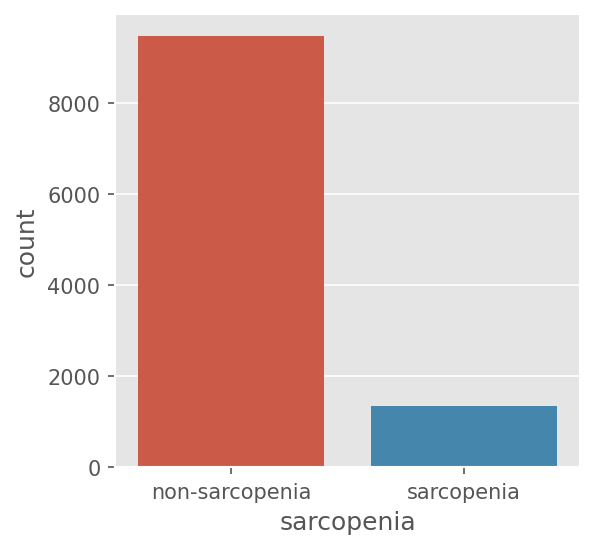

In [ ]:
plt.figure(figsize=(4, 4), dpi=150)
#plt.scatter(trues, preds)
#plt.xlim(20, 120)
#plt.ylim(20, 120)
#sns.distplot(BMI_df['sarcopenia']);
sns.countplot(data=BMI_df, x='sarcopenia')
#sns.boxplot(data=BMI_df, x='sarcopenia')

In [ ]:
BMI_df["sarcopenia"].value_counts()

non-sarcopenia    8295
sarcopenia        2546
Name: sarcopenia, dtype: int64

In [ ]:
sarcopenia = DataBlock(
        blocks=(ImageBlock(cls=PILImage), CategoryBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(valid_pct=0.2),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('file'),
        get_y=ColReader('sarcopenia'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [ ]:
sarcopeniat = DataBlock(
        blocks=(ImageBlock(cls=PILImage), CategoryBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        #splitter = RandomSplitter(valid_pct=0.2),
    #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('file'),
        get_y=ColReader('sarcopenia'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [ ]:
sarco = sarcopenia.dataloaders(BMI_df, bs=32)  # experiment part_80

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [ ]:
sarco185 = sarcopenia.dataloaders(BMI_df185, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [ ]:
sarco20 = sarcopenia.dataloaders(BMI_df20, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [ ]:
sarcot = sarcopenia.dataloaders(rest_part_20, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [ ]:
rest_part_20

,file,PatientID,height,weight,Age,BMI,BSA,sarcopenia
7,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20191225.81951.1017212.jpg,NaN,166.0,68.0,NaN,24.677021,1.756956,non-sarcopenia
16,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190124.80529.1090178.jpg,NaN,177.7,75.0,NaN,23.751247,1.924380,non-sarcopenia
20,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180221.80719.1063099.jpg,NaN,173.0,74.0,NaN,24.725183,1.876607,non-sarcopenia
26,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170210.134632.1031432.jpg,NaN,172.3,58.0,NaN,19.536980,1.687058,non-sarcopenia
31,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20191024.81319.1012005.jpg,NaN,172.3,58.0,NaN,19.536980,1.687058,non-sarcopenia
...,...,...,...,...,...,...,...,...
10822,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190703.81447.1003135.jpg,NaN,175.2,65.5,NaN,21.338952,1.798171,non-sarcopenia
10823,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190704.81253.1003258.jpg,NaN,174.9,61.0,NaN,19.941151,1.742425,non-sarcopenia
10832,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190711.82448.1003883.jpg,NaN,176.5,103.5,NaN,33.223924,2.195866,non-sarcopenia
10845,MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190723.80312.1004815.jpg,NaN,173.3,65.6,NaN,21.842720,1.785169,non-sarcopenia


In [ ]:
sarco.valid_ds

(#2168) [(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1024x841, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(1)),(PILImage mode=RGB size=1024x841, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=841x1024, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0))...]

In [ ]:
sarcot.valid_ds

(#433) [(PILImage mode=RGB size=841x1024, TensorCategory(0)),(PILImage mode=RGB size=841x1024, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(1)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0)),(PILImage mode=RGB size=1023x1023, TensorCategory(0))...]

In [ ]:
slearn = cnn_learner(sarco, resnet152, metrics=accuracy)
slearn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.485749,0.265035,0.892066,07:39


epoch,train_loss,valid_loss,accuracy,time
0,0.314571,0.313240,0.890683,04:50
1,0.218705,0.231019,0.912362,04:34
2,0.133991,0.156180,0.942343,04:35
3,0.048140,0.141697,0.950646,04:38


In [ ]:
slearn185 = cnn_learner(sarco185, resnet152, metrics=accuracy)
slearn185.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.457618,0.257606,0.902259,07:07


epoch,train_loss,valid_loss,accuracy,time
0,0.251146,0.200306,0.922545,04:47
1,0.206472,0.141428,0.942370,04:40
2,0.128413,0.123439,0.954357,04:40
3,0.043553,0.106519,0.962195,04:42


In [ ]:
slearn20 = cnn_learner(sarco20, resnet152, metrics=accuracy)
slearn20.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.497128,0.340908,0.857538,04:15


epoch,train_loss,valid_loss,accuracy,time
0,0.341474,0.317279,0.863993,04:44
1,0.274692,0.242843,0.901798,04:41
2,0.180820,0.221369,0.915629,04:41
3,0.058062,0.205370,0.919318,04:40


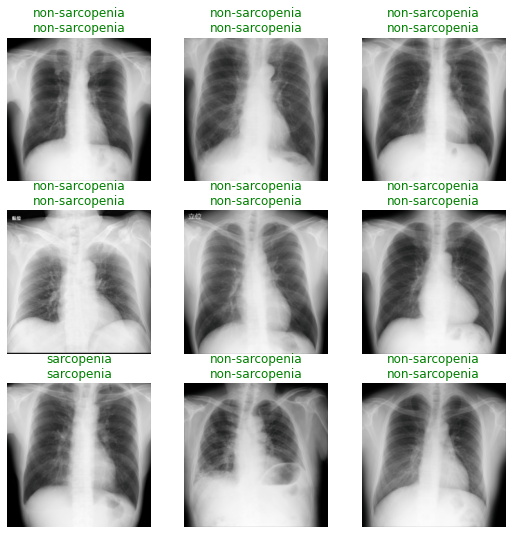

In [ ]:
slearn.show_results()

In [ ]:
preds,y, loss = slearn20.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.9193176627159119 %.


In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.966509020844281


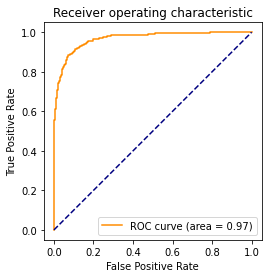

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.axis("square")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
preds = to_np(preds)
trues = to_np(trues)
preds2=np.squeeze(preds)
preds2

array([1.7687395, 1.7574039, 1.6033223, ..., 1.6228815, 1.5858271,
       1.5814099], dtype=float32)

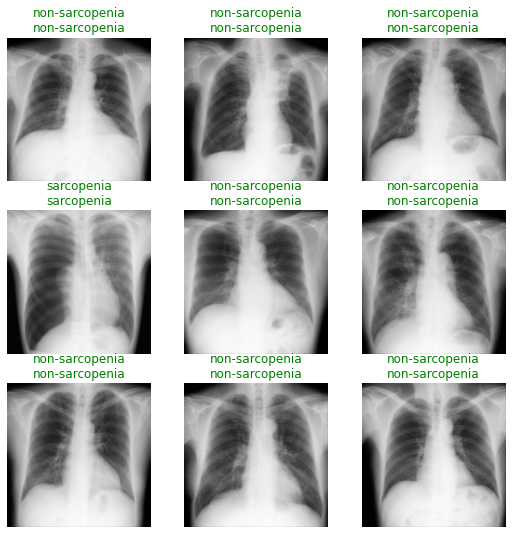

In [ ]:
slearn.show_results()

In [ ]:
interp.print_classification_report()

                precision    recall  f1-score   support

non-sarcopenia       0.97      0.97      0.97      1827
    sarcopenia       0.86      0.82      0.84       341

      accuracy                           0.95      2168
     macro avg       0.91      0.90      0.91      2168
  weighted avg       0.95      0.95      0.95      2168



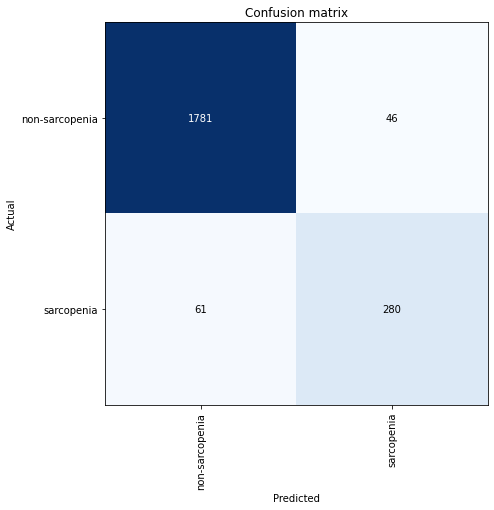

In [ ]:
interp = ClassificationInterpretation.from_learner(slearn)
losses,idxs = interp.top_losses()
#len(salco.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [ ]:
slearn.export(fname='sarcobmi20n.pkl')

In [ ]:
path=Path()
path.ls(file_exts='.pkl')
slearn = load_learner(path/'sarcobmi18.5.pkl')

In [ ]:
path = Path('sarcoman65')
img_files = get_image_files(path)
#trn,val = RandomSplitter()(img_files)
dfs = pd.DataFrame({'file': img_files})
#df["file"] = df["file"].trn
dfs["file"] = dfs["file"].astype(str)
dfs

,file
0,sarcoman65\2358965_1.JPG
1,sarcoman65\3072906_1.JPG
2,sarcoman65\3227725.JPG
3,sarcoman65\351850_1.JPG
4,sarcoman65\3623994.JPG
5,sarcoman65\7274684.JPG
6,sarcoman65\7425836_1.JPG
7,sarcoman65\7458711.JPG
8,sarcoman65\7487932.JPG
9,sarcoman65\7570151.JPG


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y, preds.argmax(dim=-1)).ravel()
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.9800315291644771

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, preds.argmax(dim=-1))

0.9566420664206642

In [ ]:
from sklearn.metrics import recall_score
recall_score(y, preds.argmax(dim=-1))

0.7886792452830189

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, preds.argmax(dim=-1))

0.81640625

In [ ]:
preds,y, loss = slearn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
F1 = F1Score(preds, y)
print('The accuracy is {0} %.'.format(acc))
print(F1)

The accuracy is 0.928966760635376 %.


In [ ]:
print('F1 is {0} %.'.format(F1))

F1 is <fastai.metrics.AccumMetric object at 0x000001E57E17B4F0> %.


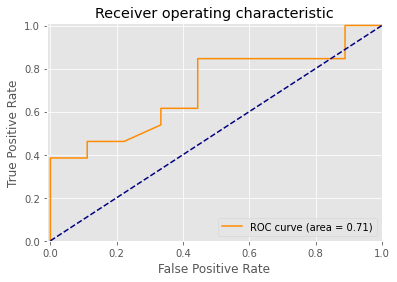

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
rest_part_20["file"]

7         MDICOM\jMAC.1.2.392.200036.9107.307.15451.20191225.81951.1017212.jpg
16        MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190124.80529.1090178.jpg
20        MDICOM\jMAC.1.2.392.200036.9107.307.15451.20180221.80719.1063099.jpg
26       MDICOM\jMAC.1.2.392.200036.9107.307.15451.20170210.134632.1031432.jpg
31        MDICOM\jMAC.1.2.392.200036.9107.307.15451.20191024.81319.1012005.jpg
                                         ...                                  
10822     MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190703.81447.1003135.jpg
10823     MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190704.81253.1003258.jpg
10832     MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190711.82448.1003883.jpg
10845     MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190723.80312.1004815.jpg
10846     MDICOM\jMAC.1.2.392.200036.9107.307.15451.20190723.80823.1004817.jpg
Name: file, Length: 2168, dtype: object

In [ ]:
slearn.predict(img)

('sarcopenia', tensor(1), tensor([0.0074, 0.9926]))

In [ ]:
path=Path()
path.ls(file_exts='.pkl')
slearn = load_learner(path/'Fsarcopenia.pkl')

In [ ]:
path = Path('sarcoman65')
img_files = get_image_files(path)
#trn,val = RandomSplitter()(img_files)
dfs = pd.DataFrame({'file': img_files})
#df["file"] = df["file"].trn
dfs["file"] = dfs["file"].astype(str)
dfs
dfs.head(5)

,file
0,sarcoman65\2358965_1.JPG
1,sarcoman65\3072906_1.JPG
2,sarcoman65\3227725.JPG
3,sarcoman65\351850_1.JPG
4,sarcoman65\3623994.JPG


In [ ]:
def hpredict(file):
  img = PILImage.create(file)
  x, = first(sarco20.test_dl([img]))
  return(slearn20.predict(img))

rows=[]
for f in dfs["file"]:
  rows.append(hpredict(f))

newdf = pd.DataFrame(rows)
newdf

,0,1,2
0,non-sarcopenia,tensor(0),"[tensor(0.9955), tensor(0.0045)]"
1,sarcopenia,tensor(1),"[tensor(0.0686), tensor(0.9314)]"
2,non-sarcopenia,tensor(0),"[tensor(0.9921), tensor(0.0079)]"
3,sarcopenia,tensor(1),"[tensor(0.2059), tensor(0.7941)]"
4,non-sarcopenia,tensor(0),"[tensor(0.9988), tensor(0.0012)]"
5,non-sarcopenia,tensor(0),"[tensor(0.7732), tensor(0.2268)]"
6,non-sarcopenia,tensor(0),"[tensor(0.9329), tensor(0.0671)]"
7,sarcopenia,tensor(1),"[tensor(0.2780), tensor(0.7220)]"
8,sarcopenia,tensor(1),"[tensor(3.5167e-05), tensor(1.0000)]"
9,non-sarcopenia,tensor(0),"[tensor(0.9602), tensor(0.0398)]"


In [ ]:
path = Path('controlman65')
img_files = get_image_files(path)
#trn,val = RandomSplitter()(img_files)
dfc = pd.DataFrame({'file': img_files})
#df["file"] = df["file"].trn
dfc["file"] = dfc["file"].astype(str)
dfc

,file
0,controlman65\2554365.JPG
1,controlman65\2933952_1.JPG
2,controlman65\6125451_1.JPG
3,controlman65\6205542.JPG
4,controlman65\6397765.JPG
5,controlman65\6967702.JPG
6,controlman65\7306616_1.JPG
7,controlman65\7425836_1.JPG
8,controlman65\7554037_1.JPG


In [ ]:
def hpredict(file):
  img = PILImage.create(file)
  x, = first(sarco20.test_dl([img]))
  return(slearn20.predict(img))

rows=[]
for f in dfc["file"]:
  rows.append(hpredict(f))

newdfc = pd.DataFrame(rows)
newdfc.head(5)

,0,1,2
0,non-sarcopenia,tensor(0),"[tensor(0.9798), tensor(0.0202)]"
1,sarcopenia,tensor(1),"[tensor(0.0756), tensor(0.9244)]"
2,non-sarcopenia,tensor(0),"[tensor(0.9632), tensor(0.0368)]"
3,non-sarcopenia,tensor(0),"[tensor(0.9976), tensor(0.0024)]"
4,sarcopenia,tensor(1),"[tensor(0.0622), tensor(0.9378)]"


In [ ]:
newdf

,0,1,2
0,non-sarcopenia,tensor(0),"[tensor(0.9955), tensor(0.0045)]"
1,sarcopenia,tensor(1),"[tensor(0.0686), tensor(0.9314)]"
2,non-sarcopenia,tensor(0),"[tensor(0.9921), tensor(0.0079)]"
3,sarcopenia,tensor(1),"[tensor(0.2059), tensor(0.7941)]"
4,non-sarcopenia,tensor(0),"[tensor(0.9988), tensor(0.0012)]"
5,non-sarcopenia,tensor(0),"[tensor(0.7732), tensor(0.2268)]"
6,non-sarcopenia,tensor(0),"[tensor(0.9329), tensor(0.0671)]"
7,sarcopenia,tensor(1),"[tensor(0.2780), tensor(0.7220)]"
8,sarcopenia,tensor(1),"[tensor(3.5167e-05), tensor(1.0000)]"
9,non-sarcopenia,tensor(0),"[tensor(0.9602), tensor(0.0398)]"


In [ ]:
newdfc

,0,1,2
0,non-sarcopenia,tensor(0),"[tensor(0.9798), tensor(0.0202)]"
1,sarcopenia,tensor(1),"[tensor(0.0756), tensor(0.9244)]"
2,non-sarcopenia,tensor(0),"[tensor(0.9632), tensor(0.0368)]"
3,non-sarcopenia,tensor(0),"[tensor(0.9976), tensor(0.0024)]"
4,sarcopenia,tensor(1),"[tensor(0.0622), tensor(0.9378)]"
5,non-sarcopenia,tensor(0),"[tensor(0.8092), tensor(0.1908)]"
6,non-sarcopenia,tensor(0),"[tensor(0.9992), tensor(0.0008)]"
7,non-sarcopenia,tensor(0),"[tensor(0.9329), tensor(0.0671)]"
8,non-sarcopenia,tensor(0),"[tensor(0.9898), tensor(0.0102)]"


In [ ]:
newdf

,0,1,2
0,non-sarcopenia,tensor(0),"[tensor(0.9955), tensor(0.0045)]"
1,sarcopenia,tensor(1),"[tensor(0.0686), tensor(0.9314)]"
2,non-sarcopenia,tensor(0),"[tensor(0.9921), tensor(0.0079)]"
3,sarcopenia,tensor(1),"[tensor(0.2059), tensor(0.7941)]"
4,non-sarcopenia,tensor(0),"[tensor(0.9988), tensor(0.0012)]"
5,non-sarcopenia,tensor(0),"[tensor(0.7732), tensor(0.2268)]"
6,non-sarcopenia,tensor(0),"[tensor(0.9329), tensor(0.0671)]"
7,sarcopenia,tensor(1),"[tensor(0.2780), tensor(0.7220)]"
8,sarcopenia,tensor(1),"[tensor(3.5167e-05), tensor(1.0000)]"
9,non-sarcopenia,tensor(0),"[tensor(0.9602), tensor(0.0398)]"


In [ ]:
newdf[4]=1

In [ ]:
newdf[3]=newdf[2].apply(lambda x: x[1])

In [ ]:
newdf[3]

0     tensor(0.0045)
1     tensor(0.9314)
2     tensor(0.0079)
3     tensor(0.7941)
4     tensor(0.0012)
5     tensor(0.2268)
6     tensor(0.0671)
7     tensor(0.7220)
8     tensor(1.0000)
9     tensor(0.0398)
10    tensor(0.9867)
11    tensor(0.0798)
12    tensor(0.9993)
Name: 3, dtype: object

In [ ]:
newdfc[3]=newdfc[2].apply(lambda x: x[1])

In [ ]:
newdfc[3]

0    tensor(0.0202)
1    tensor(0.9244)
2    tensor(0.0368)
3    tensor(0.0024)
4    tensor(0.9378)
5    tensor(0.1908)
6    tensor(0.0008)
7    tensor(0.0671)
8    tensor(0.0102)
Name: 3, dtype: object

In [ ]:
t = newdf.append(newdfc)

In [ ]:
t

,0,1,2,4,3
0,non-sarcopenia,tensor(0),"[tensor(0.9955), tensor(0.0045)]",1,tensor(0.0045)
1,sarcopenia,tensor(1),"[tensor(0.0686), tensor(0.9314)]",1,tensor(0.9314)
2,non-sarcopenia,tensor(0),"[tensor(0.9921), tensor(0.0079)]",1,tensor(0.0079)
3,sarcopenia,tensor(1),"[tensor(0.2059), tensor(0.7941)]",1,tensor(0.7941)
4,non-sarcopenia,tensor(0),"[tensor(0.9988), tensor(0.0012)]",1,tensor(0.0012)
5,non-sarcopenia,tensor(0),"[tensor(0.7732), tensor(0.2268)]",1,tensor(0.2268)
6,non-sarcopenia,tensor(0),"[tensor(0.9329), tensor(0.0671)]",1,tensor(0.0671)
7,sarcopenia,tensor(1),"[tensor(0.2780), tensor(0.7220)]",1,tensor(0.7220)
8,sarcopenia,tensor(1),"[tensor(3.5167e-05), tensor(1.0000)]",1,tensor(1.0000)
9,non-sarcopenia,tensor(0),"[tensor(0.9602), tensor(0.0398)]",1,tensor(0.0398)


In [ ]:
y = torch.tensor(t[4].values)

In [ ]:
y

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
t[3]

0     tensor(0.0045)
1     tensor(0.9314)
2     tensor(0.0079)
3     tensor(0.7941)
4     tensor(0.0012)
5     tensor(0.2268)
6     tensor(0.0671)
7     tensor(0.7220)
8     tensor(1.0000)
9     tensor(0.0398)
10    tensor(0.9867)
11    tensor(0.0798)
12    tensor(0.9993)
0     tensor(0.0202)
1     tensor(0.9244)
2     tensor(0.0368)
3     tensor(0.0024)
4     tensor(0.9378)
5     tensor(0.1908)
6     tensor(0.0008)
7     tensor(0.0671)
8     tensor(0.0102)
Name: 3, dtype: object

In [ ]:
t.dtypes

0    object
1    object
2    object
4     int64
3    object
dtype: object

In [ ]:
t[3].astype(float)

0     0.004503
1     0.931418
2     0.007927
3     0.794078
4     0.001178
5     0.226790
6     0.067128
7     0.722025
8     0.999965
9     0.039824
10    0.986657
11    0.079757
12    0.999318
0     0.020233
1     0.924359
2     0.036780
3     0.002395
4     0.937756
5     0.190790
6     0.000814
7     0.067128
8     0.010219
Name: 3, dtype: float64

In [ ]:
#probs = torch.tensor(newdf[3])
probs = torch.tensor(t[3].astype(float).values)

In [ ]:
probs

tensor([4.5033e-03, 9.3142e-01, 7.9271e-03, 7.9408e-01, 1.1775e-03, 2.2679e-01,
        6.7128e-02, 7.2203e-01, 9.9996e-01, 3.9824e-02, 9.8666e-01, 7.9757e-02,
        9.9932e-01, 2.0233e-02, 9.2436e-01, 3.6780e-02, 2.3952e-03, 9.3776e-01,
        1.9079e-01, 8.1441e-04, 6.7128e-02, 1.0219e-02], dtype=torch.float64)

In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
#probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.6623931623931624


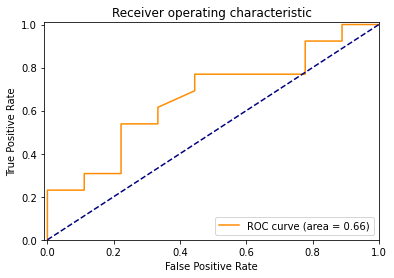

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

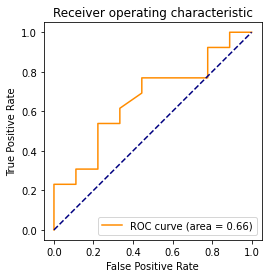

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.axis("square")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")